In [3]:
import pandas as pd

df = pd.read_csv("advertising.csv")

In [5]:
#   First 5 Rows of the Data
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
countNullValues = df.isna().sum()

sumofAllNull = countNullValues['TV'] + countNullValues['Radio'] + countNullValues['Newspaper'] + countNullValues['Sales']

if sumofAllNull > 0:
    df = df.dropna()
    countNullValues = df.isna().sum()
    sumofAllNull = countNullValues['TV'] + countNullValues['Radio'] + countNullValues['Newspaper'] + countNullValues['Sales']

print("Null Values: ", sumofAllNull)


Null Values:  0


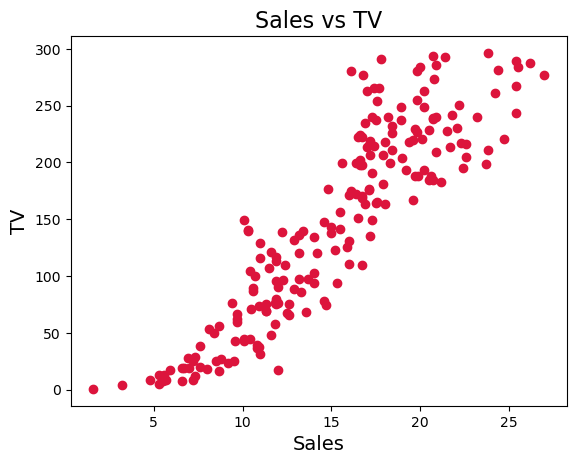

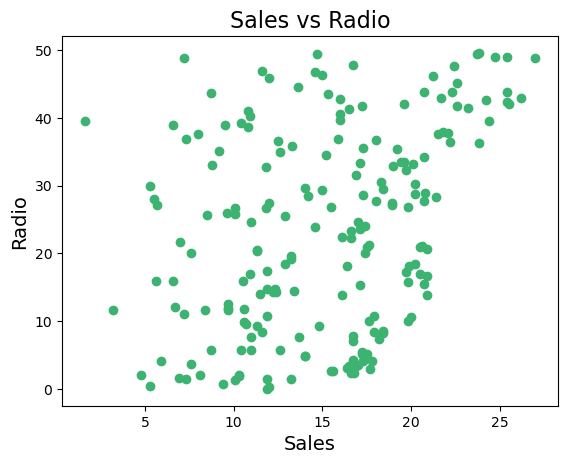

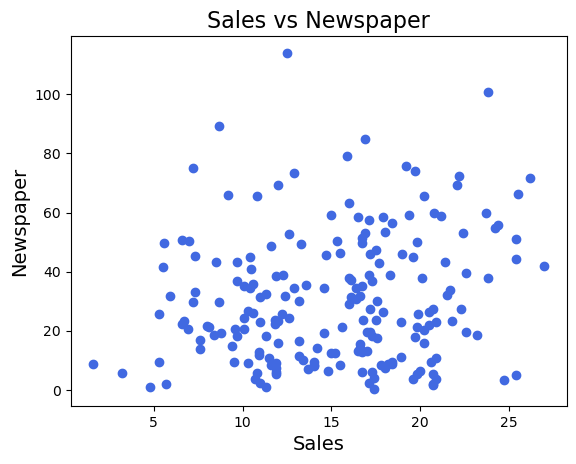

In [26]:
import matplotlib.pyplot as plt

x = 'Sales'
yTV = 'TV'
yRadio = 'Radio'
yNewspaper = 'Newspaper'

Sales = df[x]

plt.scatter(Sales, df[yTV], color = 'crimson')
plt.title('Sales vs TV', fontsize = 16)
plt.xlabel(x, fontsize = 14)
plt.ylabel(yTV, fontsize = 14)
plt.show()

plt.scatter(Sales, df[yRadio], color = 'mediumseagreen')
plt.title('Sales vs Radio', fontsize = 16)
plt.xlabel(x, fontsize = 14)
plt.ylabel(yRadio, fontsize = 14)
plt.show()

plt.scatter(Sales, df[yNewspaper], color = 'royalblue')
plt.title('Sales vs Newspaper', fontsize = 16)
plt.xlabel(x, fontsize = 14)
plt.ylabel(yNewspaper, fontsize = 14)
plt.show()


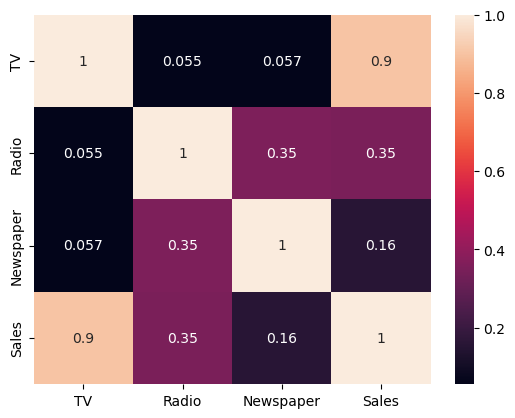

In [33]:
import seaborn as sns

sns.heatmap(df.corr(), annot = True)
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def getMaxCorr(file):
    data = np.array(file.corr())
    maxVal = -1
    maxPair = tuple()

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i][j] > maxVal and data[i][j] != 1:
                maxVal = data[i][j]
                maxPair = (i, j)

    data = file.corr().to_string().split()
    return (data[maxPair[0]], data[maxPair[1]])

rel1, rel2 = getMaxCorr(df)

def trainModel(data, col1, col2):
    x = data[[col1]]
    y = data[[col2]]

    trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 0)

    model = LinearRegression()
    model.fit(trainX, trainY)

    predictY = model.predict(testX)

    mse = mean_squared_error(testY, predictY)
    r2 = r2_score(testY, predictY)

    return (mse, r2)

print(f"Maximum Correlation between {rel1} and {rel2}")

mse, r2 = trainModel(df, rel1, rel2)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Maximum Correlation between TV and Sales
Mean Squared Error: 6.639091226559299
R2 Score: 0.8010943934328407
